In [ ]:
# Step 1: Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [ ]:
# Step 2: Load Dataset
file_path = 'ifood_df (1).csv'
data = pd.read_csv(file_path)

In [ ]:
# Step 3: Data Exploration and Cleaning
print("Data Info:\n", data.info())
print("First 5 rows of the data:\n", data.head())
print("Summary statistics:\n", data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

In [ ]:
# Step 4: Feature Selection
features = ['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
            'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
            'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

In [ ]:
# Step 5: Data Standardization (Normalization)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[features])

In [ ]:
# Step 6: Clustering using K-Means
inertia = []
for n in range(1, 11):
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

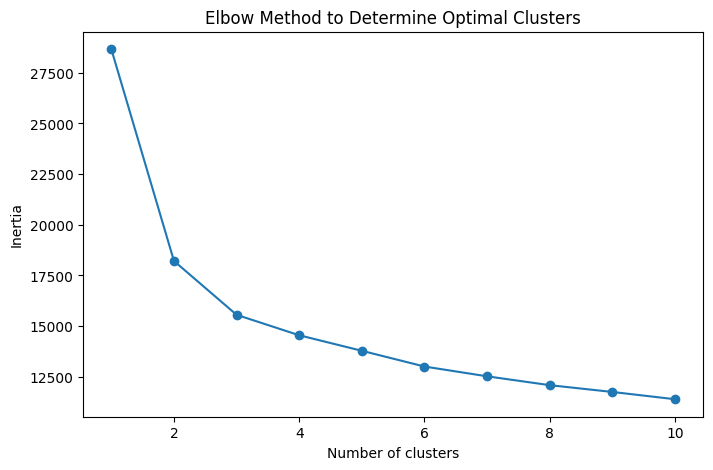

In [ ]:
# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method to Determine Optimal Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [ ]:
# Choose optimal clusters (e.g., 4 based on the elbow curve)
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
data['Cluster'] = kmeans.fit_predict(data_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


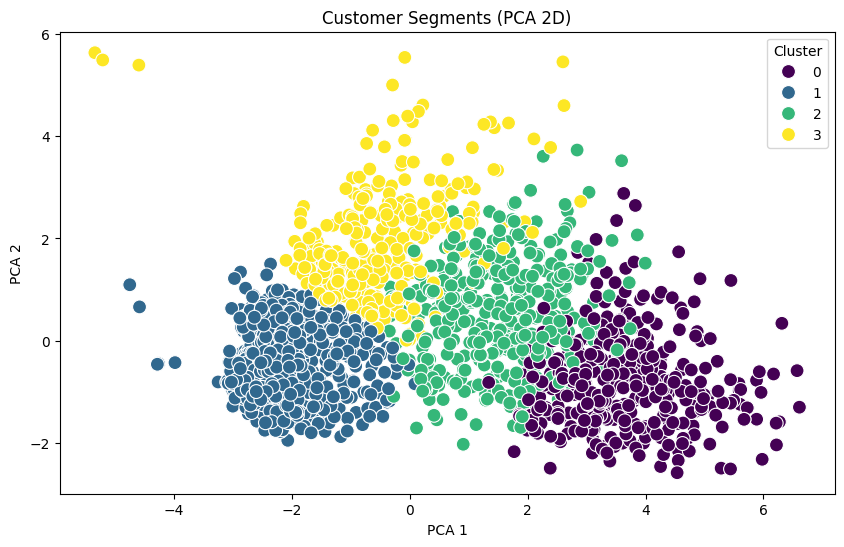

In [ ]:
# Step 7: Visualization of Customer Segments
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=data['Cluster'], palette='viridis', s=100)
plt.title('Customer Segments (PCA 2D)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

In [ ]:
# Step 8: Analyze Customer Segments
cluster_analysis = data.groupby('Cluster')[features].mean()
print("Cluster Analysis:\n", cluster_analysis)

Cluster Analysis:
                Income    Recency    MntWines  MntFruits  MntMeatProducts  \
Cluster                                                                    
0        76495.433180  49.529954  576.997696  79.930876       495.672811   
1        34228.606707  49.023374   38.490854   4.764228        20.875000   
2        66830.484716  49.266376  607.131004  32.209607       212.906114   
3        49660.759878  47.920973  330.501520  12.428571        95.255319   

         MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
Cluster                                                                       
0             115.854839         80.025346     85.488479           1.294931   
1               7.018293          4.969512     14.513211           1.875000   
2              42.692140         34.146288     58.281659           2.155022   
3              19.796353         13.854103     57.963526           5.221884   

         NumWebPurchases  NumCatalogPurchases  Nu

In [ ]:
# Step 9: Insights and Recommendations
for cluster in range(optimal_clusters):
    print(f"\nInsights for Cluster {cluster}:")
    print(f"Avg Income: {cluster_analysis['Income'][cluster]:.2f}")
    print(f"Avg Recency: {cluster_analysis['Recency'][cluster]:.2f}")
    print(f"Avg Spending on Wines: {cluster_analysis['MntWines'][cluster]:.2f}")
    print(f"Avg Number of Web Purchases: {cluster_analysis['NumWebPurchases'][cluster]:.2f}")


Insights for Cluster 0:
Avg Income: 76495.43
Avg Recency: 49.53
Avg Spending on Wines: 577.00
Avg Number of Web Purchases: 5.10

Insights for Cluster 1:
Avg Income: 34228.61
Avg Recency: 49.02
Avg Spending on Wines: 38.49
Avg Number of Web Purchases: 2.00

Insights for Cluster 2:
Avg Income: 66830.48
Avg Recency: 49.27
Avg Spending on Wines: 607.13
Avg Number of Web Purchases: 6.03

Insights for Cluster 3:
Avg Income: 49660.76
Avg Recency: 47.92
Avg Spending on Wines: 330.50
Avg Number of Web Purchases: 6.39
